In [2]:
%matplotlib notebook
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.figsize'] = (8, 8)
import numpy as np
import os
import pandas as pd
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import cv2

In [23]:
def time2seconds(dt):
    """Convert datetime object to seconds."""

    seconds = (dt.hour*60 + dt.minute)*60 + dt.second + dt.microsecond*1e-6
    return seconds

In [39]:
angles = []
past_measurements_paths = sorted(glob.glob('data/cam_104/sun_positions/*.csv'))
for path in past_measurements_paths:
    data = pd.read_csv(path, index_col=0, parse_dates=True)
    data = data[data['object']=='Sun']
    data = data[
            (data['sunshader_angle']>20)&\
            (data['sunshader_angle']<160)
            ]
    data.index = data.index.time
    angles.append(data['sunshader_angle'])
sunshader_angles_df = pd.concat(angles, axis=1).mean(axis=1).to_frame(name='angle')
sunshader_angles_df.head()

,angle
05:02:55.263732,21.0
05:08:55.263676,23.0
05:10:48.689758,22.0
05:14:55.100073,24.0
05:17:25.479028,24.0


In [40]:
X = np.array(
    [time2seconds(dt) for dt in sunshader_angles_df.index]
).reshape(-1, 1)
y = sunshader_angles_df['angle'].values

<IPython.core.display.Javascript object>


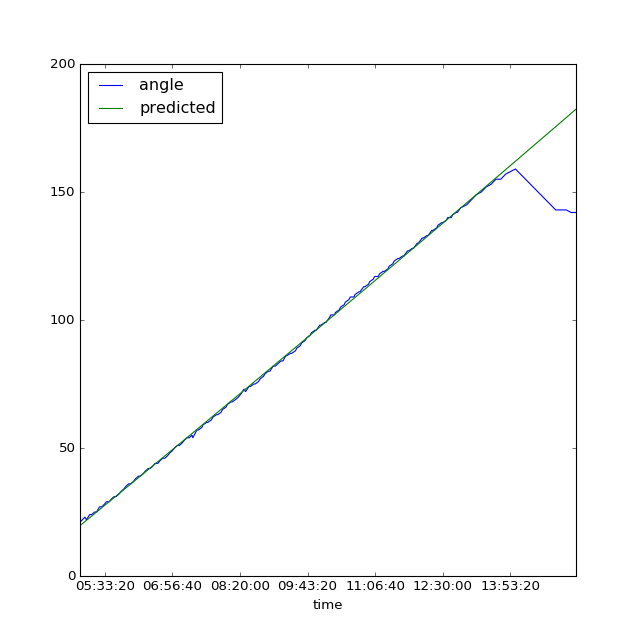

In [41]:
sunshader_angle_model = make_pipeline(
            PolynomialFeatures(2), linear_model.RANSACRegressor(random_state=0, residual_threshold=5)
        )
sunshader_angle_model.fit(X, y)
y_ = sunshader_angle_model.predict(X)
sunshader_angles_df['predicted'] = pd.Series(y_, index=sunshader_angles_df.index)
sunshader_angles_df.plot()

In [58]:
angles.shape

(1465, 5)

In [55]:
X = ((angles.index - pd.tslib.Timestamp('2016-08-25')) / np.timedelta64(1, 's')).values.reshape(-1, 1)
y = angles['day_25'].values.reshape(-1, 1)

In [58]:
angles.shape

(1465, 5)

In [88]:
y_ = angles['day_27']
X = ((angles.index[~pd.isnull(y_)] - pd.tslib.Timestamp('2016-08-25')) / np.timedelta64(1, 's')).values.reshape(-1, 1)
y = y_[~pd.isnull(y_)]
X = X[:200]
y = y.ix[:200]

In [89]:
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

<IPython.core.display.Javascript object>


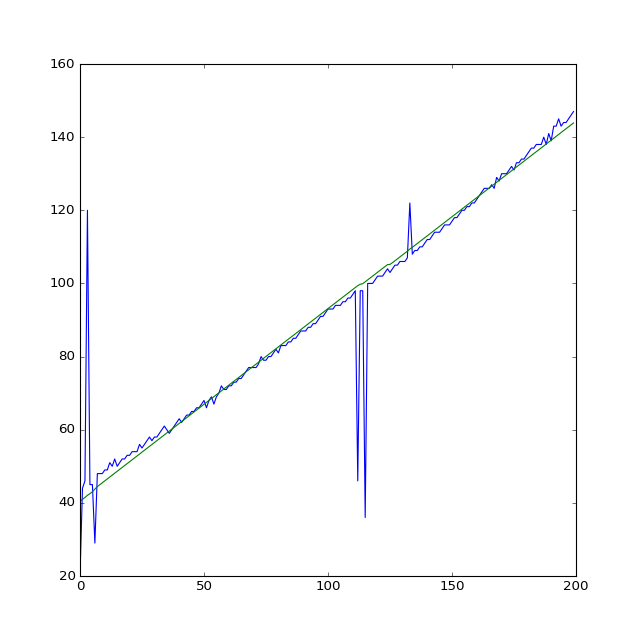

In [95]:
plt.figure()
plt.plot(y.values)
plt.plot(model_ransac.predict(X))

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = np.array((1., 2., 3, 4)).reshape(-1, 1)
y = np.array((2, 3, 4, 2))
model = make_pipeline(PolynomialFeatures(2), linear_model.RANSACRegressor(random_state=0))
model.fit(X, y)

#plt.figure()
#plt.plot(y.values)
#plt.plot(model.predict(X), 'y')
#plt.plot(model_ransac.predict(X), 'r')                

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ransacregressor', RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=0,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf))])

In [9]:
model.predict(np.array((1,)).reshape(-1, 1))[0]

1.8500000000000023

In [112]:
plt.plot(X)

In [127]:
p = model.get_params()['steps'][1][1]

In [132]:
p.predict(np.eye(3))

array([-2.12550363, -2.12324325, -2.12550362])

In [152]:
p.estimator_.intercept_

-2.1255036279317352

In [138]:
p.estimator_.coef_

array([  0.00000000e+00,   2.26037450e-03,   8.92018807e-09])

In [146]:
from sklearn.linear_model.base import LinearModel

In [158]:
class A(LinearModel):
    def fit(X, y):
        pass
    
p1 = A()

In [159]:
p1.coef_ = p.estimator_.coef_
p1.intercept_ = p.estimator_.intercept_

In [160]:
p1.predict(np.eye(3))

array([-2.12550363, -2.12324325, -2.12550362])

16795.896393
16975.831019
17171.043552
17335.777198
17515.734805
17695.932014
17912.253547
18092.22852
18272.165422
18452.10138
18632.060606
18812.257761
18992.193342
19172.180358
19352.119672
19532.058428
19712.278506
19892.217671
20072.177922
20252.112391
20432.073442
20612.269803
20792.204879
20972.186736
21152.122325
21332.081807
21512.277281
21692.213709
21872.175624
22052.111342
22232.071634
22412.267309
22592.206214
22772.141551
22952.078866
23132.274364
23312.258552
23492.196517
23672.131422
23852.092326
24032.285898
24212.222716
24392.182345
24572.118982
24752.079969
24932.301372
25112.237715
25292.198462
25472.136488
25652.098445
25832.293214
26113.623779
26293.652398
26473.589585
26653.551895
26833.48916
27013.451749
27193.646894
27373.583209
27553.543855
27733.47993
27913.440467
28093.635608
28273.572073
28453.507998
28633.445494
28813.640539
28993.576567
29173.561617
29353.49856
29533.459093
29713.654739
29893.591593
30073.551368
30253.48682
30433.44868
30613.644408
30793.

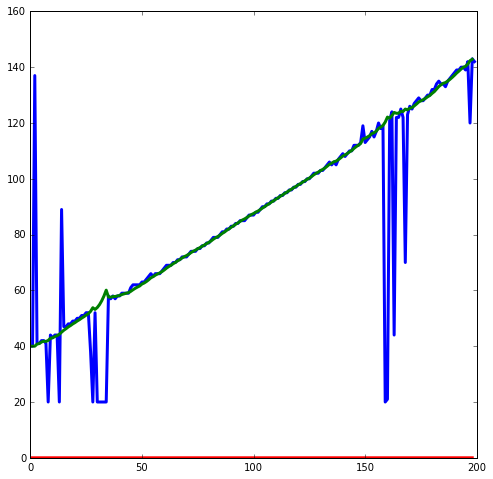

In [32]:
kalman = cv2.KalmanFilter(2, 1, 0)

code = long(-1)

kalman.processNoiseCov = np.array(((1, 0), (0 , 1e-4)))
kalman.measurementNoiseCov = 1e4 * np.ones((1, 1))
kalman.errorCovPost = np.ones((2, 2))

#
# Initialization
#
predictions = []
last_t = None
for row in data.iterrows():
    t, values = row
    print (t - pd.tslib.Timestamp('2016-08-28')).total_seconds()
    measured_angle = values["sunshader_angle"]
    if last_t is None:
        kalman.statePost = np.array(((measured_angle,), (0.,)))
        last_t = t
        continue

    dt = (t-last_t).total_seconds()
    kalman.transitionMatrix = np.array([[1., dt], [0., 1.]])
    kalman.measurementMatrix = np.array([[1, dt]])

    prediction = kalman.predict()
    predictions.append(prediction)

    if abs(measured_angle-prediction[0,0]) > 10:
        continue

    kalman.correct(np.array(measured_angle).reshape(1,1))
    last_t = t

predictions = np.squeeze(predictions)
plt.figure()
plt.plot(data['sunshader_angle'].values, linewidth=3.0)
plt.plot(predictions, linewidth=3.0)

In [110]:
data['sunshader_angle'].values

array([  39.,   40.,   40.,   41.,   42.,   41.,   37.,   20.,   20.,
         43.,   94.,   46.,   46.,   45.,   44.,   48.,   46.,   47.,
         47.,   48.,   48.,   49.,   50.,   50.,   51.,   50.,   51.,
         51.,   52.,   51.,   52.,   54.,   52.,   20.,   53.,   38.,
         57.,   56.,   58.,   59.,   58.,   58.,   58.,   57.,   60.,
         61.,   61.,   61.,   62.,   63.,   62.,   63.,  111.,   64.,
         64.,   65.,   65.,   66.,   20.,  129.,   69.,   20.,   20.,
         69.,  126.,   71.,   71.,   69.,   70.,   71.,   72.,   72.,
         74.,   73.])

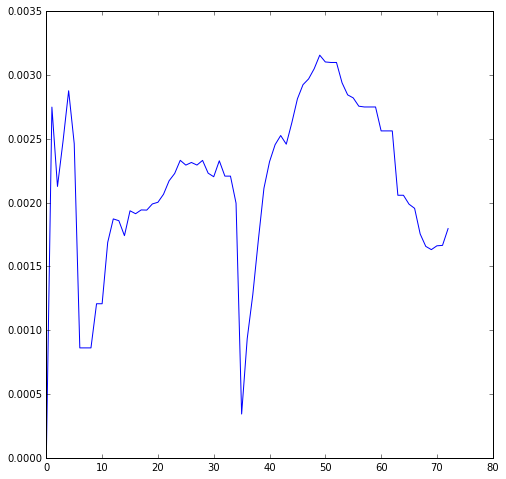

In [117]:
plt.plot(predictions[:,1])

In [170]:
angles

,day_25,day_26,day_27,day_28,day_29
2016-08-25 04:33:13.833433,123,NaN,NaN,NaN,NaN
2016-08-25 04:36:13.718658,40,NaN,NaN,NaN,NaN
2016-08-25 04:36:24.746604,NaN,NaN,NaN,NaN,39
2016-08-25 04:39:13.606336,40,NaN,NaN,NaN,NaN
2016-08-25 04:39:24.708001,NaN,NaN,NaN,NaN,40
2016-08-25 04:39:55.896393,NaN,NaN,NaN,40,NaN
2016-08-25 04:42:24.666815,NaN,NaN,NaN,NaN,40
2016-08-25 04:42:55.831019,NaN,NaN,NaN,40,NaN
2016-08-25 04:43:32.789854,20,NaN,NaN,NaN,NaN
2016-08-25 04:45:13.709554,41,NaN,NaN,NaN,NaN


In [171]:
a = [1, 2]

In [173]:
a[-2:]

[1, 2]

In [174]:
data = pd.read_csv('data/sun_positions_101/2016_08_25.csv'.format(i), index_col=0, parse_dates=True)

In [176]:
data.tail()

,object,pos_x,pos_y,sunshader_angle
2016-08-25 23:38:20.374597,Moon,896.060606,927.242424,-1
2016-08-25 23:41:20.364010,Moon,938.906250,960.125000,-1
2016-08-25 23:44:20.353065,Moon,921.727273,946.969697,-1
2016-08-25 23:47:20.342191,Moon,889.742857,922.571429,-1
2016-08-25 23:50:20.331883,Moon,941.281250,962.468750,-1


In [177]:
data.index

DatetimeIndex(['2016-08-25 04:33:13.833433', '2016-08-25 04:36:13.718658',
               '2016-08-25 04:39:13.606336', '2016-08-25 04:43:32.789854',
               '2016-08-25 04:45:13.709554', '2016-08-25 04:48:13.596455',
               '2016-08-25 04:51:13.721371', '2016-08-25 04:54:13.611436',
               '2016-08-25 04:57:13.735673', '2016-08-25 05:00:13.622836',
               ...
               '2016-08-25 23:23:20.453861', '2016-08-25 23:26:20.432408',
               '2016-08-25 23:29:20.415094', '2016-08-25 23:32:20.399399',
               '2016-08-25 23:35:20.387106', '2016-08-25 23:38:20.374597',
               '2016-08-25 23:41:20.364010', '2016-08-25 23:44:20.353065',
               '2016-08-25 23:47:20.342191', '2016-08-25 23:50:20.331883'],
              dtype='datetime64[ns]', length=385, freq=None)

In [ ]:
hourly = data.index.resample('H')
hourly.index = pd.MultiIndex.from_arrays([hourly.index.hour, hourly.index.normalize()])
hourly.unstack().plot()

In [181]:
data.head()

,object,pos_x,pos_y,sunshader_angle
2016-08-25 04:33:13.833433,Sun,280.029851,507.761194,123
2016-08-25 04:36:13.718658,Sun,284.327402,509.300644,40
2016-08-25 04:39:13.606336,Sun,292.632451,509.975445,40
2016-08-25 04:43:32.789854,Sun,1171.618965,2070.926356,20
2016-08-25 04:45:13.709554,Sun,291.315573,521.953998,41


In [180]:
data.resample('H').head()

,pos_x,pos_y,sunshader_angle
2016-08-25 04:00:00,390.309678,694.066294,47.777778
2016-08-25 05:00:00,344.939896,572.103964,59.950000
2016-08-25 06:00:00,437.052660,635.302024,55.850000
2016-08-25 07:00:00,543.051912,681.103270,69.250000
2016-08-25 08:00:00,656.781414,721.348282,75.750000


In [182]:
data.index = data.index.time

In [183]:
data.head()

,object,pos_x,pos_y,sunshader_angle
04:33:13.833433,Sun,280.029851,507.761194,123
04:36:13.718658,Sun,284.327402,509.300644,40
04:39:13.606336,Sun,292.632451,509.975445,40
04:43:32.789854,Sun,1171.618965,2070.926356,20
04:45:13.709554,Sun,291.315573,521.953998,41
